In [67]:
import pandas as pd
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers, models, callbacks
from keras.callbacks import EarlyStopping
import numpy as np

In [68]:
folder_path = r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\Data train\All_train_files"
all_data = []
labels = []
LABELS = [ 'Ammonia','Benzene','H2S','Sulfur','Ozone','Toluene','Xylene','Regular','noise']  # Add more gas names as needed




deal with both multiple columns data files and a single columns data files

In [ ]:
# # Load and concatenate all CSV files into one DataFrame
# labels = []
# all_data = []
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)
#         print(f"Processing file: {filename}, shape: {df.shape}")

#                 # Drop completely blank rows and columns
#         df.dropna(how='all', axis=0, inplace=True)  # Drop blank rows
#         df.dropna(how='all', axis=1, inplace=True)  # Drop blank columns


#         # Determine the gas type based on the filename
#         gas_type = None
#         for i, gas in enumerate(LABELS):
#             if gas in filename:
#                 gas_type = i
#                 break

#         if gas_type is not None:
#             # Check if the file has one column or multiple columns
#             if df.shape[1] < 3:
#                 # Single column file: add the entire column as one example
#                 all_data.append(df.iloc[:, 0].values)
#                 labels.append(gas_type)
#             else:
#                 # Multiple columns file: add each row as a separate example
#                 for _, row in df.iterrows():
#                     if len(row.values) == 311:  # Check if row has 311 values
#                         all_data.append(row.values)
#                         labels.append(gas_type)
#                     else:
#                         print(f"Skipping row in {filename} due to incorrect length: {len(row.values)}")


# # Convert lists to numpy arrays
# X = np.array(all_data)
# y = np.array(labels)

# # Ensure X and y have the expected shape
# print("X shape:", X.shape)
# print("y shape:", y.shape)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# # Debug prints to verify the shapes of the arrays
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [75]:
# Load and concatenate all CSV files into one DataFrame
labels = []
all_data = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        print(f"Processing file: {filename}, shape: {df.shape}")

                # Drop completely blank rows and columns
        df.dropna(how='all', axis=0, inplace=True)  # Drop blank rows
        df.dropna(how='all', axis=1, inplace=True)  # Drop blank columns


        # Determine the gas type based on the filename
        gas_type = None
        for i, gas in enumerate(LABELS):
            if gas in filename:
                gas_type = i
                break

        if gas_type is not None:
            # Check if the file has one column or multiple columns
            if df.shape[1] < 3:
                # Single column file: add the entire column as one example
                if len(df) == 311:
                    all_data.append(df.iloc[:, 0].values)
                    labels.append(gas_type)
                else:
                    print(f"Skipping file {filename} due to incorrect length: {len(df)}")
            else:
                # Multiple columns file: add each row as a separate example
                for row_idx, row in df.iterrows():
                    if len(row.values) == 312:
                        # If the row has 312 values, ignore the last value
                        all_data.append(row.values[:311])
                        labels.append(gas_type)
                        print(f"Processed row {row_idx + 1} in multi-column file: {filename}")
                    elif len(row.values) == 311:
                        all_data.append(row.values)
                        labels.append(gas_type)
                        print(f"Processed row {row_idx + 1} in multi-column file: {filename}")
                    else:
                        print(f"Skipping row {row_idx + 1} in {filename} due to incorrect length: {len(row.values)}")


# Convert lists to numpy arrays
X = np.array(all_data)
y = np.array(labels)

# Ensure X and y have the expected shape
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Debug prints to verify the shapes of the arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Processing file: Ammonia_1000_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_100_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_1010_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_10_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_110_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_120_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_130_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_140_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_150_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_160_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_170_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_180_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_190_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_200_ppm_meter_noisy.csv, shape: (311, 1)
Processing file: Ammonia_20_ppm_meter_noisy.csv, shape: (311, 1)
Processing

In [23]:

df = pd.read_csv(r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas_detector\UV\Code\code_files\UV Spectrum\Data train\17_05 data\augmented_1m_ammonia_leftright.csv")

df_array = np.array(df)
x = df.shape[0]
for i in range(x):
    row_needed = df_array[i,1:]
df_array[:,1:].shape

(179, 311)

In [38]:
A=df_array[:,1:]
B=df_array[:,1:]
T=[]

A=np.ndarray.tolist(A)
B=np.ndarray.tolist(B)
T=A+B


In [41]:
np.array(T).shape

(358, 311)

In [26]:
# Load and concatenate all CSV files into one DataFrame
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        t = df.to_numpy()

        # Determine the gas type based on the filename
        for i, gas in enumerate(LABELS):
            if gas in filename:
                labels.append(i)
                break

        all_data.append(t[:,0])

X = np.array(all_data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

IndentationError: unexpected indent (1467785889.py, line 9)

In [4]:
max(labels)

8

In [5]:
len(all_data)

1707

In [6]:
len(labels)

1707

In [7]:
X_train.shape[1]

311

In [8]:
# Build the model
model = models.Sequential([
    layers.Dense(250, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dense(180, activation='tanh'),
    layers.Dense(100, activation='tanh'),
    layers.Dense(50, activation='tanh'),
    layers.Dense(20, activation='tanh'),
    layers.Dense(len(LABELS), activation='softmax')
])

model.summary()

C:\Users\thaim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 250)            │        78,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 180)            │        45,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        18,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,539 (576.32 KB)

 Trainable params: 147,539 (576.32 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.load_weights('s1.weights.h5')

In [10]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10,
          validation_split=0.2, callbacks=[early_stopping],shuffle=True)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2223 - loss: 2.5539 - val_accuracy: 0.8117 - val_loss: 0.9672
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8907 - loss: 0.8962 - val_accuracy: 0.9540 - val_loss: 0.5536
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9418 - loss: 0.5571 - val_accuracy: 0.9874 - val_loss: 0.3221
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9559 - loss: 0.3686 - val_accuracy: 0.9665 - val_loss: 0.2878
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.3081 - val_accuracy: 0.9582 - val_loss: 0.2479
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9362 - loss: 0.3063 - val_accuracy: 0.9623 - val_loss: 0.2213
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.2634 - val_accuracy: 0.9916 - val_loss: 0.1390
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.2096 - val_accuracy: 0.9833 - val_loss:

In [11]:
model.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.2001 


[0.18110240995883942, 0.9727095365524292]

In [12]:
model.save_weights('s1.weights.h5')

In [45]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
Aset=X_test
Bset=y_test
import seaborn as sn
from sklearn import metrics

output=np.zeros(Aset.shape[0])
for i in range (Aset.shape[0]):
    input=np.expand_dims(Aset[i,:], axis=0)
    output[i]=np.argmax(model.predict(input))

cm = metrics.confusion_matrix(Bset,output)
df_cm = pd.DataFrame(cm, range(np.max(y_test)+1), range(np.max(y_test)+1))
df_cm

UnicodeEncodeError: 'charmap' codec can't encode characters in position 18-37: character maps to <undefined>

In [51]:
X_test[1,:]

array([4.40911652e-21, 3.28801198e-21, 2.45171090e-21, 1.97777070e-21,
       1.68275644e-21, 1.43166462e-21, 9.14307079e-22, 4.36572179e-22,
       2.12947601e-22, 8.19348466e-23, 5.83725727e-23, 4.15861796e-23,
       3.03624607e-23, 2.65620570e-23, 2.32373417e-23, 2.03287738e-23,
       1.70347889e-23, 1.32875179e-23, 1.03645623e-23, 8.13177125e-24,
       6.44835396e-24, 5.11343317e-24, 4.04164397e-24, 3.11336281e-24,
       2.39806325e-24, 2.08404816e-24, 6.18413556e-24, 2.01788570e-23,
       5.45480022e-23, 2.79599556e-22, 6.40762821e-22, 1.03556546e-21,
       1.47353305e-21, 2.09672855e-21, 2.80203239e-21, 3.71640053e-21,
       5.74744922e-21, 1.47385008e-20, 5.07059160e-20, 3.96949221e-19,
       2.51102483e-18, 5.46772320e-17, 5.72908895e-16, 6.83836587e-15,
       4.65073886e-14, 2.36565117e-13, 1.09220596e-12, 4.59031606e-12,
       7.63923028e-12, 1.21626906e-11, 1.64399291e-11, 2.13388901e-11,
       2.76951084e-11, 5.05594118e-11, 3.19291203e-10, 2.29253760e-09,
      

Test


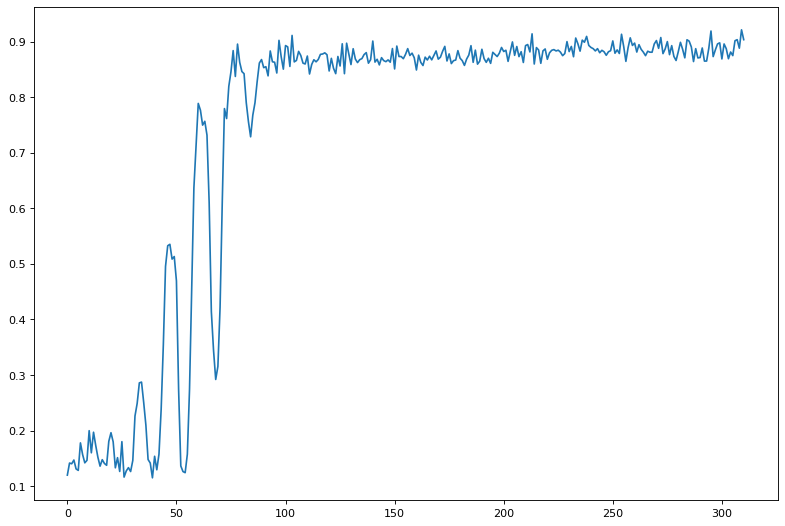

In [47]:
path=r"C:\Users\thaim\OneDrive\Desktop\Tal_Projects\Gas cells check\Amonia 6000\05_03.xlsx"

xsls_files = pd.read_excel(path)
t=np.array(xsls_files)
test_input=(t[3,647:958]/100).astype('float32')
#
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_input)



In [48]:
index=10
#X_test[index,:]
input1=np.expand_dims(test_input, axis=0)
output=model.predict(input1)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.5960446 , 0.10186987, 0.16586591, 0.04629164, 0.00085614,
        0.00400773, 0.02786521, 0.0430737 , 0.01412527]], dtype=float32)

In [49]:
LABELS[np.argmax(output)]

'Ammonia'

In [50]:
LABELS[y_test[index]]

'noise'